### **Laptop Price Pridiction**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading Dataset**

In [44]:
data=pd.read_csv('laptopPrice.csv')
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


## **Data Stucture**

In [45]:
data.shape

(823, 19)

In [46]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [48]:
data.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


## **Duplicates**

In [49]:
data.duplicated().sum()

21

we have 21 duplicates
if we won't remove duplicates it will over learn these so removing duplicates
Also don't have primary key

In [50]:
data[data.duplicated()]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
13,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
45,ASUS,Intel,Core i3,11th,8 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,45990,4 stars,816,147
125,ASUS,Intel,Core i3,10th,4 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,40990,4 stars,4008,519
182,DELL,Intel,Core i3,11th,4 GB,DDR4,256 GB,1024 GB,Windows,64-bit,0 GB,ThinNlight,1 year,No,Yes,43590,3 stars,0,0
265,ASUS,Intel,Core i5,11th,16 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,59990,3 stars,0,0
352,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,84990,3 stars,0,0
375,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,Yes,No,99990,3 stars,0,0
391,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
393,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
399,Avita,Intel,Core i5,8th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,73063,3 stars,17,3


In [51]:
data.drop_duplicates(inplace=True)

### **Missing Values**

In [52]:
# No missing value in our data  set
data.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

### **Encoding**
  - object to text

In [53]:
data.select_dtypes(include='object')

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,2 stars
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,3 stars
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,3 stars
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,3 stars
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,3 stars
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,3 stars


#### **Brand**

In [54]:
data['brand'].value_counts()

brand
ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: count, dtype: int64

### **processor_brand**

In [55]:
data['processor_brand'].value_counts()

processor_brand
Intel    594
AMD      189
M1        19
Name: count, dtype: int64

### **processor_name**

In [56]:
data['processor_name'].value_counts()

processor_name
Core i5         284
Core i3         161
Core i7         104
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     23
M1               19
Pentium Quad     13
Core i9           8
Name: count, dtype: int64

### **processor_gnrtn**

In [57]:
data['processor_gnrtn'].value_counts()

processor_gnrtn
11th             328
Not Available    224
10th             198
8th               35
7th                7
9th                6
12th               3
4th                1
Name: count, dtype: int64

### **ram_gb**

In [58]:
data['ram_gb'].value_counts()

ram_gb
8 GB     404
4 GB     223
16 GB    173
32 GB      2
Name: count, dtype: int64

### **ram_type**

In [59]:
data['ram_type'].value_counts()

ram_type
DDR4       690
LPDDR4X     56
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64

## **ssd**

In [60]:
data['ssd'].value_counts()

ssd
512 GB     389
256 GB     174
0 GB       123
1024 GB    110
128 GB       3
2048 GB      2
3072 GB      1
Name: count, dtype: int64

## **hdd**

In [61]:
    data['hdd'].value_counts()

hdd
0 GB       602
1024 GB    159
512 GB      40
2048 GB      1
Name: count, dtype: int64

## **os**

In [62]:
data['os'].value_counts()

os
Windows    763
Mac         23
DOS         16
Name: count, dtype: int64

## **os_bit**

In [63]:
data['os_bit'].value_counts()

os_bit
64-bit    693
32-bit    109
Name: count, dtype: int64

## **graphic_card_gb**

In [64]:
data['graphic_card_gb'].value_counts()

graphic_card_gb
0 GB    557
4 GB    127
2 GB     67
6 GB     37
8 GB     14
Name: count, dtype: int64

## **weight**

In [65]:
data['weight'].value_counts()

weight
Casual        509
ThinNlight    254
Gaming         39
Name: count, dtype: int64

## **warranty**

In [66]:
data['warranty'].value_counts()

warranty
1 year         498
No warranty    268
2 years         23
3 years         13
Name: count, dtype: int64

## **Touchscreen**

In [67]:
data['Touchscreen'].value_counts()

Touchscreen
No     706
Yes     96
Name: count, dtype: int64

## **msoffice**

In [68]:
data['msoffice'].value_counts()

msoffice
No     522
Yes    280
Name: count, dtype: int64

## **rating**

In [69]:
data['rating'].value_counts()

rating
4 stars    437
3 stars    338
5 stars     16
2 stars      9
1 star       2
Name: count, dtype: int64

 ### Label Encoding 
 Label Encoding assigns a unique integer to each category. This method does not take into account any ordinal relationship
between categories and is often used for categorical variables where the categories do not have an intrinsic order.

- CALC,CAEC,MTRANS,NObeyesdad  Check for Order
- NObeyesdad BMI Test Height and Age

In [70]:
# Label Encoding assigns a unique integer to each category. This method does not take into account any ordinal relationship
#between categories and is often used for categorical variables where the categories do not have an intrinsic order.
## CALC,CAEC,MTRANS,NObeyesdad  Check for Order
# NObeyesdad BMI Test Height and Age
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()


In [71]:
object_column=data.select_dtypes(include=object)

In [72]:
for i in object_column:
    data[i]=label_encoder.fit_transform(data[i])

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   brand              802 non-null    int32
 1   processor_brand    802 non-null    int32
 2   processor_name     802 non-null    int32
 3   processor_gnrtn    802 non-null    int32
 4   ram_gb             802 non-null    int32
 5   ram_type           802 non-null    int32
 6   ssd                802 non-null    int32
 7   hdd                802 non-null    int32
 8   os                 802 non-null    int32
 9   os_bit             802 non-null    int32
 10  graphic_card_gb    802 non-null    int32
 11  weight             802 non-null    int32
 12  warranty           802 non-null    int32
 13  Touchscreen        802 non-null    int32
 14  msoffice           802 non-null    int32
 15  Price              802 non-null    int64
 16  rating             802 non-null    int32
 17  Number of Ratings  80

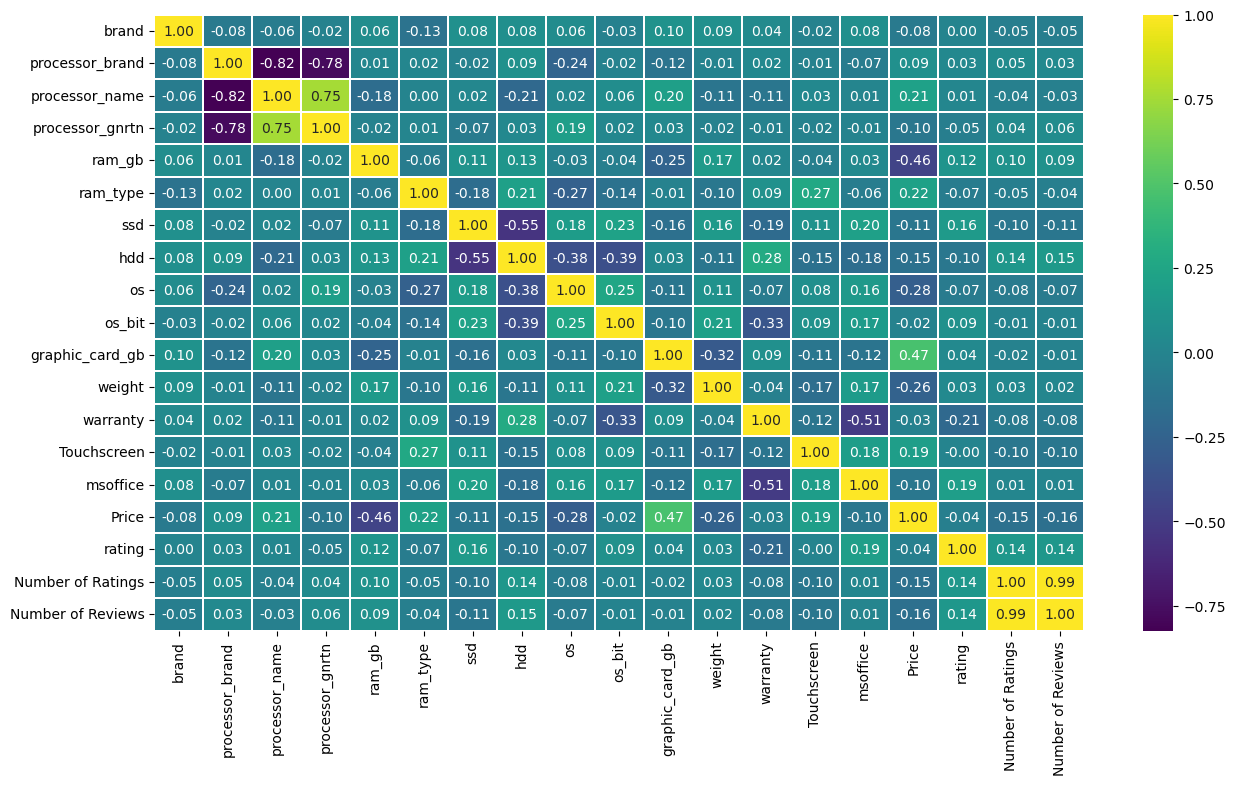

In [74]:
#Last after Encoding
import seaborn as sns
plt.figure(figsize=(15, 8))
correlation=data.corr()
ax=sns.heatmap(correlation,annot=True,cmap='viridis',linewidth=0.1, fmt='.2f')  #coolwarm
# Adjust the aspect ratio to control column width
ax.set_aspect("auto")
plt.show()

## **Model Training**

In [75]:
X=data.drop(columns=['Price'])
y=data['Price']

## Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalize the features
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)
X_scaled = min_max_scaler.transform(X)

In [76]:
from sklearn.model_selection import train_test_split
## Logistic Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
X_train

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating,Number of Ratings,Number of Reviews
442,1,1,2,1,3,1,4,1,2,0,0,0,0,0,1,3,1188,127
598,1,1,3,0,0,5,0,3,0,0,3,0,3,0,0,2,2,1
452,1,1,2,1,3,1,4,1,2,1,1,0,0,0,1,3,33,4
696,3,0,8,7,3,1,6,0,2,1,0,2,0,0,1,2,0,0
339,1,1,2,1,3,5,6,0,2,1,0,0,0,1,0,3,35,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,5,1,1,0,2,1,4,0,2,0,0,0,3,0,0,2,3,0
108,3,1,1,1,3,1,6,0,2,1,0,0,0,1,0,3,10,1
275,5,1,2,0,3,1,6,0,2,1,1,0,0,0,1,2,0,0
445,1,1,2,1,3,1,4,1,2,1,0,0,0,0,0,2,0,0


In [81]:
## Intialize Logistic Regression on object
model = RandomForestClassifier()
# Training the model
model.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
## predictions
y_pred=model.predict(X_test)

In [83]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 596860535.6397516
R^2 Score: 0.7194238823812038


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Dictionary to store results
results = {}

# Perform grid search and evaluation for each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Fit the model on training data
    model.fit(X_train, y_train)
    
    # Predict using the model
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {'RMSE': rmse, 'R-squared': r2}
    
    # Print results
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} R-squared: {r2}")
    print("\n")

# Print final results
print("Final Results:")
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"RMSE: {result['RMSE']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")


Training Linear Regression...
Linear Regression RMSE: 28760.53677455294
Linear Regression R-squared: 0.6111592145380544


Training Decision Tree...
Decision Tree RMSE: 30830.514428492203
Decision Tree R-squared: 0.5531730289900296


Training Random Forest...
Random Forest RMSE: 22728.44810586982
Random Forest R-squared: 0.7571615771776892


Final Results:
Model: Linear Regression
RMSE: 28760.53677455294
R-squared: 0.6111592145380544


Model: Decision Tree
RMSE: 30830.514428492203
R-squared: 0.5531730289900296


Model: Random Forest
RMSE: 22728.44810586982
R-squared: 0.7571615771776892


